In [22]:
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt

# 1. Import dataset

## 1.1 Import data

In [23]:
path = "D:\DA\Project\Python\data"
df = pd.read_csv(path + "\sales2019_1.csv")
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"


## 1.2 Merge 12-month data

In [24]:
frames = []

for file in os.listdir(path): # Phương thức os.listdir() trả về 1 list chứa tên của các tập tin con bên trong đường dẫn tập tin được cho vào phương thức
    filepath = path + "/" + file # Duyệt qua từng đường dẫn bên trong tập tin chứa toàn bộ file data và tạo đường dẫn mới tới từng tập tin con
    df1 = pd.read_csv(filepath) # Tạo dataframe mới với đường dẫn vừa tạo được ở trên
    frames.append(df1) # Add dataframe vừa tạo vào 1 list mới, list này sẽ chứa tất cả dataframe vừa được tạo
    result = pd.concat(frames) # phương thức pd.concat sẽ nối tất cả các dataframe trong list frames thành 1 dataframe lớn

df = result
df.to_csv('annualSales2019.csv', index=False) # Tạo 1 file csv mới chứa toàn bộ data được gộp lại


# 2. Clean and process

## 2.1 Get month from Column OrderDate

In [25]:
df["Month"] = df["Order Date"].str.slice(0,2)
df.head(2)
print(set(df['Month'])) # Kiểm tra các tháng bằng cách cho cột Month vào trong 1 set để lấy ra các giá trị unique
# Kết quả cho thấy có 2 giá trị khác thường là nan và Or

{nan, '10', '02', '05', '07', '01', '12', '03', '06', '08', '04', '09', 'Or', '11'}


## 2.2 Drop NaN and "Or" Value

In [26]:
df = df.dropna(how='all') # Phương thức dropna(how ="all") sẽ loại bỏ các hàng có tất cả các cột đều NaN

In [27]:
df[df['Month'] == "Or"] # Kiểm tra các giá trị "Or" trong cột Month nhận thấy đây đều là tiêu đề của bảng khi gộp vào ở b1
df = df[df['Month'] != "Or"] # Cập nhật lại df bằng cách cho df bằng vs bảng có cột Month chứa giá trị khác "Or"
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01


# 3. Report

## 3.1 What was the best month for sales? How much was earned that month?

In [28]:
# Kiểm tra kiểu dữ liệu của columns trong df
df.dtypes

# Chuyển đổi kiểu dữ liệu của cột "Quantity Ordered" và "Price Each" về dạng số để tính toán
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], downcast = 'integer')
df["Price Each"] = pd.to_numeric(df["Price Each"], downcast = 'float')

# Tạo cột Revenue để tính doanh số của từng hàng tương ứng từ 2 cột "Quantity Ordered" và "Pricce Each"
df['Revenue'] = df["Quantity Ordered"] * df['Price Each']
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95


In [29]:
# Nhóm giá trị Revenue lại theo cột Month bằng phương thức df.groupby, sau đó gán cho giá trị sales_value
sales_value = df.groupby('Month').sum()['Revenue']
sales_value.min()

1822256.75

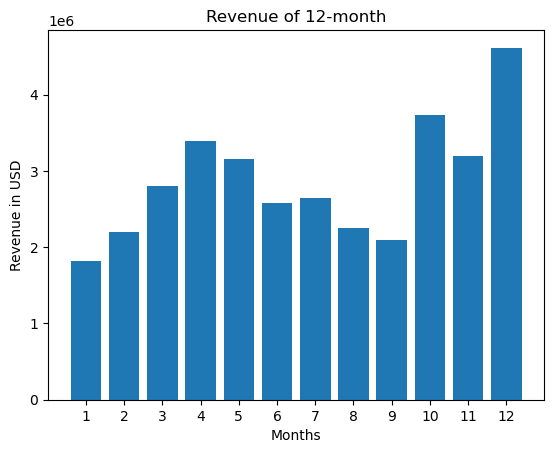

In [30]:
# Vẽ biểu đồ với thư viện Matplolib
months = range(1,13)
plt.bar(x = months, height = sales_value)
plt.xticks(months)
plt.title("Revenue of 12-month")
plt.xlabel('Months')
plt.ylabel('Revenue in USD')
plt.show()

### - *December is the month with the highest revenue with 4613443.5 USD* 
### - *And next, January is the month with the lowest revenue only 1822256.75 USD*
### Why is December sales higher than other months?
### - Because December is the time for Christmas and then the New Year, consumers will spend heavily in December.
### - And vice versa, after spending on major holidays taking place during and after December, users will limit spending, leading to a marked decrease in January revenue.



## 3.2 What city has the best sales?

In [31]:
# Tạo hàm để tách str của cột "Purchare Address" sau đó lấy thành phố trong list từ str tách ra
getCity = lambda address:address.split(",")[1]
# Sử dụng phương thức apply để áp dụng hàm lên cho toàn bộ giá trị của cột
df["City"] = df["Purchase Address"].apply(getCity)
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95,Portland


In [32]:
# Sau khi có được cột city, bắt đầu dùng phương thức df.groupby để nhóm các hàng lại theo city và tính tổng theo Revenue
sales_by_city = df.groupby(df["City"]).sum()['Revenue']
sales_by_city

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Revenue, dtype: float32

In [33]:
sales_by_city.max()

8262204.0

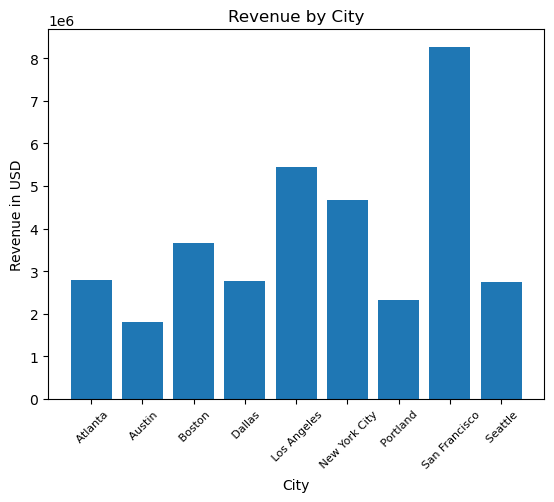

In [34]:
# Lấy ra từng biết Cite để thêm vào list city, nhằm tạo biến cho trục X khi vẽ biểu đồ
city = [cite for cite, sale in sales_by_city.items()] # sales_by_city trả về 1 Series, dùng vòng lặp qua từng id, value với phương thức for .items()

plt.bar(x = city, height=sales_by_city)
plt.xticks(city, rotation = 45, size = 8)
plt.title('Revenue by City')
plt.xlabel('City')
plt.ylabel('Revenue in USD')
plt.show()

### *- San Francisco is the city with the largest revenue of the cities*
### *- Austin is the city with the smallest revenue*
### - San Francisco has the highest revenue because the economy here is very strong, tourist destinations, business development, vs gdp 2018 is 513 billion USD (3 times higher than the city of Austin)
### - In contrast, Austin is not an economic city, business tourism is not as developed as other cities, GDP in 2018 is only 152 billion USD

## 3.3 What time should we display ads to maximize the likelihood of customer's buying product?

In [57]:
# Convert type của cột "Order Date" về dạng datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Tạo cột mới chứa giá trị là thời điểm mua hàng tính bằng giờ
df["Hour"] = df["Order Date"].dt.hour

order_by_hour = df.groupby(df["Hour"]).count()['Revenue']

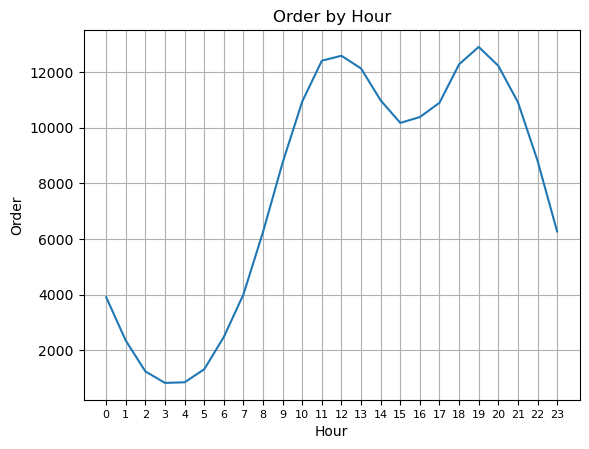

In [36]:
hours = [hour for hour, sale in order_by_hour.items()]
plt.plot(hours, order_by_hour)
plt.grid()
plt.xticks(hours, size = 8)
plt.title('Order by Hour')
plt.xlabel('Hour')
plt.ylabel('Order')
plt.show()

### - *As can be easily seen, we have 2 time frames where the number of purchases is the most that is from 10am to 12pm and from 6pm to 8pm.*
### - Therefore, the marketing department should promote advertising display before 2 time frames about 1 hour, in order to be effective, increase the number of orders placed by customers.

## 3.4 What products are most often sold together?

In [76]:
# Tạo df chứa các order có Order ID trùng nhau
df_dup = df[df["Order ID"].duplicated(keep=False)]
df_dup.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,8


In [77]:
# Viết hàm xử lý gộp các sản phẩm lại thành chuỗi
groupProduct = lambda product: ', '.join(product)

In [ ]:
# Tạo cột All Products chứa chuỗi các sản phẩm được gộp lại từ những sản phẩm có Order ID trùng nhau
df_dup["All Products"] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


In [79]:
#  Xóa bỏ các cột trùng lặp
df_dup = df_dup[["Order ID", "All Products"]].drop_duplicates()

# Xuất ra file csv để tiện cho đội Marketing dễ sử dụng
df_dup["All Products"].value_counts().head(10).to_csv('ProductSets.csv')
df_dup["All Products"].value_counts().head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Products, dtype: int64

### - *The table above contains the top 10 product combos that are often purchased together*
### - When you know which products are popular, businesses can sell products in combos + 1 less popular product, to accelerate sales of the other less popular product.
### - Or discount when buying combos of remaining best-selling products to stimulate purchases

## 3.5 What products sold the most? Why is the product selling well?

In [70]:
all_products = df.groupby("Product").sum()["Quantity Ordered"]
all_products.head(10)

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
Name: Quantity Ordered, dtype: float64

In [71]:
# Tính giá trung bình cho 1 sản phẩm
prices = df.groupby('Product').mean()["Price Each"]

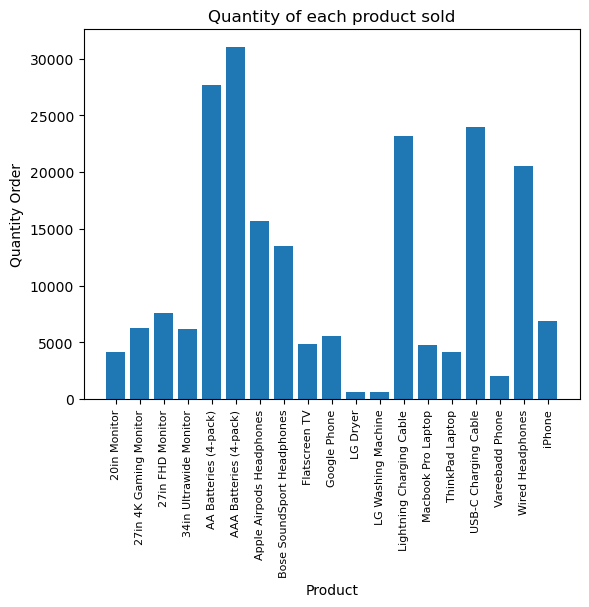

In [72]:
products_ls = [product for product, quant in all_product.items()]
plt.bar(products_ls, all_product)
plt.xticks(products_ls, rotation = 90, size = 8)
plt.title('Quantity of each product sold')
plt.xlabel('Product')
plt.ylabel('Quantity Order')
plt.show()

C:\Users\lehoa\AppData\Local\Temp\ipykernel_22008\2104262393.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


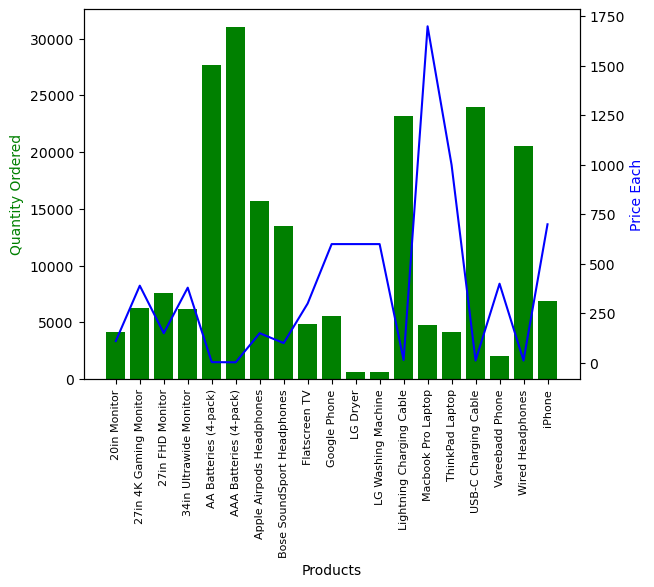

In [80]:
x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()